# Day 1 – Environment Setup & Data Sanity Check

**Objective:**  
Verify that the development environment is correctly configured and that data
can be loaded reliably using reproducible paths.

This notebook intentionally avoids modeling and focuses on:
- interpreter / kernel sanity
- filesystem paths
- basic data integrity checks

In [17]:
# ==============================
# 0) Setup
# ==============================
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)
TARGET = "Survived"
RANDOM_SEED = 42


In [11]:
print("Python executable:")
print(sys.executable)

print("\nPython version:")
print(sys.version)

Python executable:
/usr/bin/python3

Python version:
3.10.12 (main, Jan  8 2026, 06:52:19) [GCC 11.4.0]


In [12]:
from pathlib import Path

# Find project root by searching for README.md
PROJECT_ROOT = Path.cwd()
while not (PROJECT_ROOT / "README.md").exists():
    PROJECT_ROOT = PROJECT_ROOT.parent

DATA_PATH = PROJECT_ROOT / "data" / "titanic.csv"

print("Project root:", PROJECT_ROOT)
print("Data path:", DATA_PATH)
print("Data path exists:", DATA_PATH.exists())

assert DATA_PATH.exists(), f"Missing data file: {DATA_PATH}"

Project root: /home/michael/ml-30day-projects
Data path: /home/michael/ml-30day-projects/data/titanic.csv
Data path exists: True


In [18]:
# ==============================
# 1) Load data
# ==============================
assert DATA_PATH.exists(), f"Missing file: {DATA_PATH}"
df = pd.read_csv(DATA_PATH)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
# ==============================
# 2) Basic structure
# ==============================
print("Shape:", df.shape)
display(df.sample(5, random_state=RANDOM_SEED))

df.info()

Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
# ==============================
# 3) Column roles (quick categorization)
# ==============================
id_cols = ["PassengerId"] if "PassengerId" in df.columns else []
target_col = TARGET

numeric_cols = df.select_dtypes(include="number").columns.tolist()
categorical_cols = df.select_dtypes(exclude="number").columns.tolist()

# Remove target + IDs from feature lists
numeric_features = [c for c in numeric_cols if c not in id_cols + [target_col]]
categorical_features = [c for c in categorical_cols if c not in [target_col]]

print("ID columns:", id_cols)
print("Target:", target_col)
print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

ID columns: ['PassengerId']
Target: Survived
Numeric features: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical features: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [21]:
# ==============================
# 4) Missingness
# ==============================
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(1)

missing_table = pd.DataFrame({"missing": missing, "missing_%": missing_pct})
display(missing_table[missing_table["missing"] > 0])

,missing,missing_%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


Counts:
 Survived
0    549
1    342
Name: count, dtype: int64

Rates:
 Survived
0    0.616
1    0.384
Name: proportion, dtype: float64


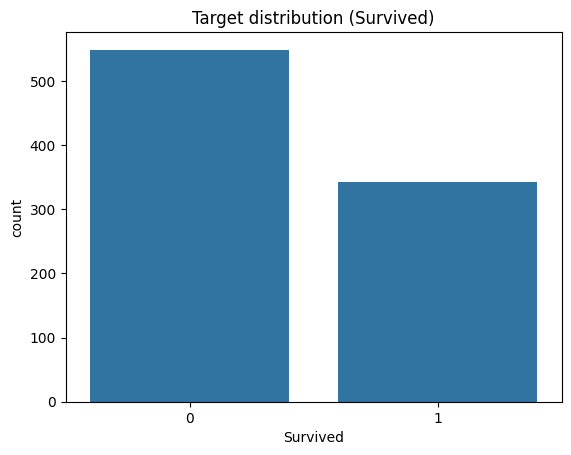

In [22]:
# ==============================
# 5) Target balance
# ==============================
counts = df[TARGET].value_counts()
rates = df[TARGET].value_counts(normalize=True).round(3)

print("Counts:\n", counts)
print("\nRates:\n", rates)

sns.countplot(x=TARGET, data=df)
plt.title("Target distribution (Survived)")
plt.show()

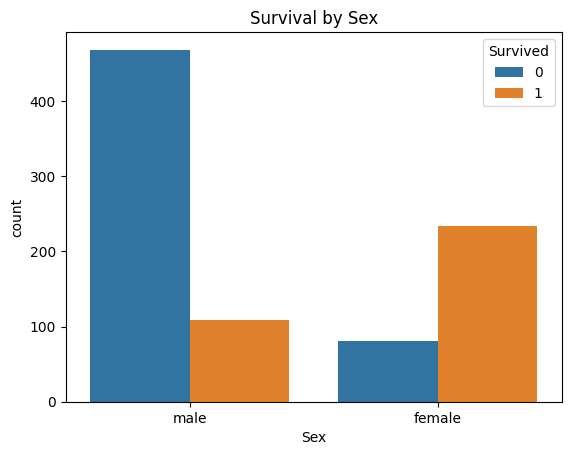

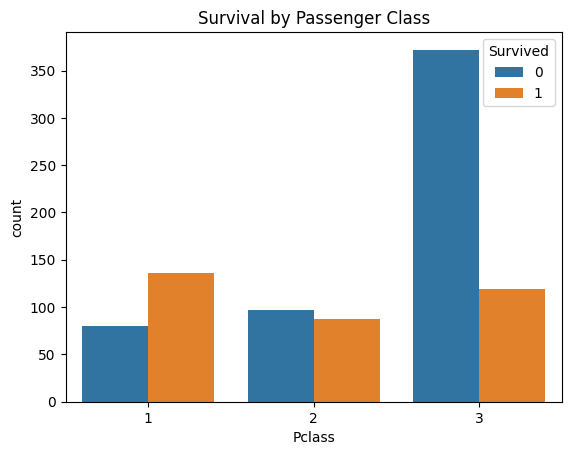

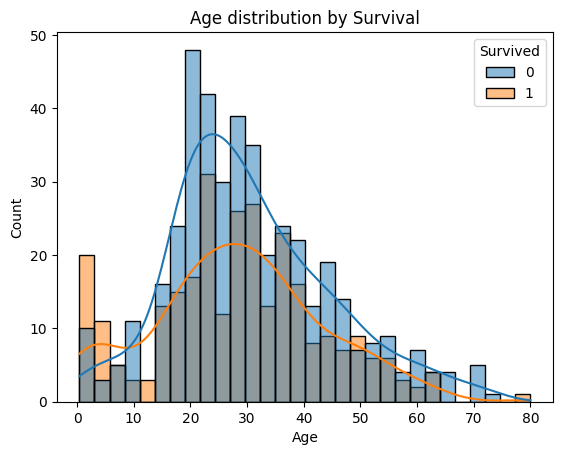

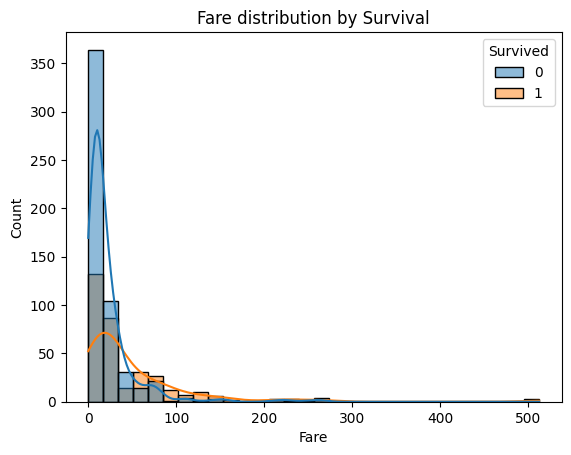

In [23]:
# ==============================
# 6) Quick EDA plots (high-signal)
# ==============================
sns.countplot(x="Sex", hue=TARGET, data=df)
plt.title("Survival by Sex")
plt.show()

sns.countplot(x="Pclass", hue=TARGET, data=df)
plt.title("Survival by Passenger Class")
plt.show()

sns.histplot(data=df, x="Age", hue=TARGET, kde=True, bins=30)
plt.title("Age distribution by Survival")
plt.show()

sns.histplot(data=df, x="Fare", hue=TARGET, kde=True, bins=30)
plt.title("Fare distribution by Survival")
plt.show()

# ==============================
# 7) EDA Notes 
# ==============================

### Initial Observations

1. The dataset contains 891 rows and 12 columns.
2. `Cabin` has a very high proportion of missing values.
3. `Age` has moderate missingness and will require imputation.
4. `Embarked` has minimal missingness and is safe to impute.
5. `PassengerId` appears to be an identifier rather than a predictive feature.